# Project: Investigating the No-Show Appointment Dataset #


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

**Introduction**

No-shows occur, when a patient fails to attend a scheduled appointment with no prior notification to the healthcare provider. They are missed healthcare utilized time slots and resources that can negatively affect the utilization of space and human resources.

In order to identify common reasons and patterns why patients miss appointments, this study collects dataset from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The dataset is sourced from a secondary data source particularly  __[kaggle](http://www.kaggle.com)__


**Research Questions**


1. Does no-show count have a correlation with ages?

2. What is the ratio between genders

2. Does the time between the scheduled and the appiontment time have an effect on no-show?

3. Does no-show count have a correlation with receiving SMS?

4.  Checking if there is any relationship between peoples personal ailment and no-shows

In [1]:
# import libraries and packages
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Accessing data ##

In [2]:
#Reading csv file
Appointment_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
Appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
# this returns the first fIVE lines in our dataframe
Appointment_df.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Returns the last five rows
Appointment_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Both the tail and head functions provided an overview of the dataset. To get the full shapes and data types of each variables, we run the apprioriate analysis.

In [5]:
# This returns a tuple of the dimensions of the dataframe
Appointment_df.shape

(110527, 14)

In [6]:
# this returns the number of unique values in each column
Appointment_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# View the index number and label for each column
for i, v in enumerate(Appointment_df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


## Data Wrangling 

The data Wrabling process to be conducted involves te following: 

-  Identify the missing values within the dataset. 
-  Check to see if each columns is in the right datset
-  Ensure all the data is tidy and clean in terms of both structures and values

In [8]:
Appointment_df.isnull().sum()  # to identify missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

None of the columns contains an empyty dataset

In [9]:
# check for duplicates in the data
Appointment_df.duplicated().sum()

0

In [10]:
# this returns the datatypes of the columns
Appointment_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The data set was found to be free of missing values and of correct data types. Also, each variable names was found to be descriptive. Next, we observe data of data quality and tidy it approriately.

In [11]:
# this returns useful descriptive statistics for each column of data
Appointment_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The data above is quite interesting particularly the Age column. The age distribution of the sample seems to contain some errors. The youngest person is -1 and the oldest is 115. the yougest age is obivisoly an error. Although the oldest age might seem unlikely but its still common as there are verifiable individuals within the age bracket of over a 110 years. The boxplot below reveals this outliers found in the data set.

Next part is to clean the data set the age variable. This would enables me to get rid of dirty observations within the variable. 

**Data Cleaning**

This is done in a couple of steps
- Drop extreanous columns
- Fix the error that occured within the age columns
- Include an extra coulmn that shows waiting time

In [12]:
# Drop extreanous columns such as PatientId, AppointmentID, Neighbourhood, SCholarship
Appointment_df.drop(['AppointmentID', 'PatientId','Neighbourhood', 'Scholarship' ], axis=1, inplace=True)

In [13]:
# Identify the row index of -1 value for Age and then drop it
Appointment_df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,0,0,0,0,0,No


In [14]:
# Drop this dataset since it migt have occured as a result of error
Appointment_df.drop(index=99832, inplace=True)

In [15]:
#Confirm that the error has been eliminated off the dataset
Appointment_df.describe()

,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age is no longer -1

In [16]:
# let's get the day difference when someone is scheduled and the particular appointment day

dt1 = pd.to_datetime(Appointment_df['AppointmentDay'], format='%Y/%m/%d')
dt = pd.to_datetime(Appointment_df['ScheduledDay'], format='%Y/%m/%d')

Appointment_df["DayDiff"] = (dt1-dt).dt.days

In [17]:
# Confrim if the DayDiff column has been added

Appointment_df

,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayDiff
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,No,-1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No,-1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No,-1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No,-1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,0,No,-1
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,1,No,34
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,1,No,34
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,1,No,40
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,1,No,40


<AxesSubplot:>

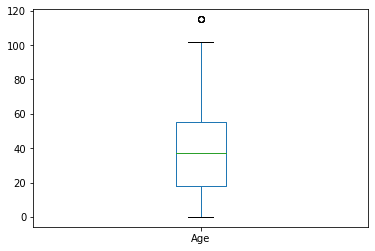

In [18]:
# Display boxplot to verify the outcome
Appointment_df.Age.plot(kind = 'box')


## Exploratory Data Analysis ##

*Univariate Analysis*

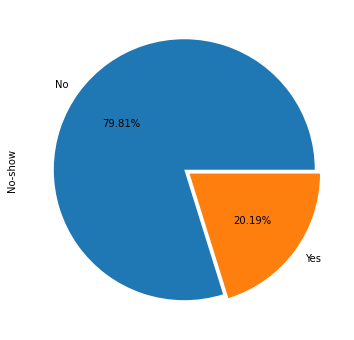

In [19]:
# Pie charts to show the ratio of no-show those that showed
Appointment_df["No-show"].value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

Just over 20% of all appointments resulted in no shows. The research questions will attempt to answer if the demographics of these populations are the same. This shows that majority of respondents’ actually keep to their appoitment. Regardless, 20% of the entire dataset is quite a lot which is quite important we conduct an extensive search into it to figure out the reasons.

In [20]:
Appointment_df["Gender"].value_counts(normalize=True)

F    0.649974
M    0.350026
Name: Gender, dtype: float64

65% of the entire dataset are found to be female. The ratio of male to female can be represented in barcharts below

In [21]:
def makebar(column):
    '''A function to draw bar charts''' 
    show = Appointment_df[column].value_counts().plot(kind = 'bar', title = f'{column} by Count', xlabel = f'{column}', ylabel ='Count', style = ('fivethirtyeight')) 
    return show

<AxesSubplot:title={'center':'Gender by Count'}, xlabel='Gender', ylabel='Count'>

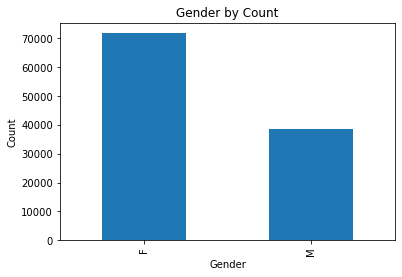

In [22]:
# Bar chart showing number of patients by gender
makebar("Gender")

The chart shows that out of the total sampled patients, 35% are male and 65% are female. It is obvious from the above that most of the respondents are female. It is often more common for women to check out a medical facility whenever they feel unwell.

In [23]:
def hist_plot_by (x, xlabel, ylabel,Title,Legend):
    '''A function to draw a histgram '''
    ax = plt.subplot(1,1,1)
    ax.hist(x)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(Title)
    plt.legend(Legend)
    plt.show()
    

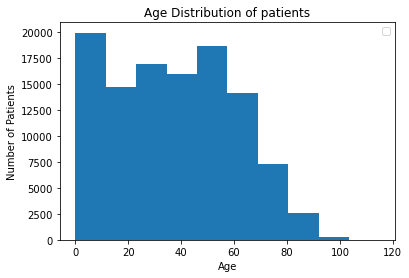

Mean age: 37.09


In [24]:
# Shows the age distribution of the dataset
hist_plot_by(Appointment_df['Age'],'Age','Number of Patients','Age Distribution of patients','')
print('Mean age: {:.2f}'.format(Appointment_df["Age"].mean()));

### Categorical Classification of Dataset based on their ability to keep to appiontment

In [25]:
# Dataset for those that kept to their appiontment 
Appointment_No_df = Appointment_df[Appointment_df["No-show"] == 'No']


In [26]:
# Confirmation of those that kept to their appointment
Appointment_No_df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayDiff
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,No,-1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No,-1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No,-1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No,-1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,0,No,-1


In [27]:
# Dataset for those that missed their appiontment
Appointment_Yes_df = Appointment_df[Appointment_df["No-show"] == 'Yes']


In [28]:
# Those that missed their appointment
Appointment_Yes_df

,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayDiff
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,0,0,0,0,0,Yes,1
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,0,0,0,0,0,Yes,1
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,0,0,0,0,1,Yes,2
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,0,0,0,0,0,Yes,0
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,0,0,0,0,0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,0,0,0,0,0,Yes,3
110492,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,1,0,0,0,0,Yes,-1
110496,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,1,0,0,0,0,Yes,1
110515,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,1,0,0,0,0,Yes,1


## Bivariate Analysis

### Research Question 1: Does no-show count have a correlation with ages?

In [29]:
# let's get the descriptive statistic of the Age to all those that showed up 
Appointment_No_df['Age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [30]:
# let's get the descriptive statistic of the Age to all those that missed their appointment
Appointment_Yes_df.Age.describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

The maximum age for both missed and kept is 116 years while the mimium for both is the same.The main focus of the analysis is the mean. The mean age for those that kept their appointment is lower when compared to those missed their appointment

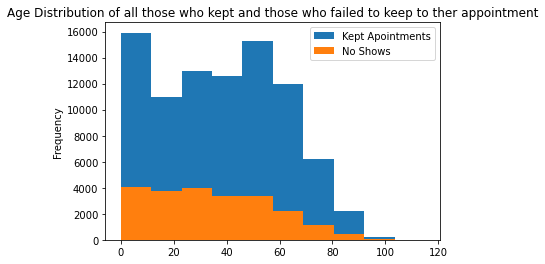

Kept Appointments Mean Age:37.79
Missed Appointments Mean Age:34.32


In [31]:
# let's use histogram to check the Age  distribution of those that kept ad those missed their appointment
Appointment_No_df.Age.plot.hist()
Appointment_Yes_df.Age.plot.hist()
plt.title('Age Distribution of all those who kept and those who failed to keep to ther appointment')
plt.legend(['Kept Apointments', 'No Shows'])
plt.show()
print('Kept Appointments Mean Age:{:.2f}'.format(Appointment_No_df.Age.mean()))
print('Missed Appointments Mean Age:{:.2f}'.format(Appointment_Yes_df.Age.mean()))

This histogram overlays the distributions of kept appointments and no shows so that they can be compared. The peak near 60 years is much smaller for no shows. The mean value for Missed Appointmet is also lower but is not apparent with a histogram. 

 ### Research Question 2: What is the ratio between genders

Text(0.5, 1.0, 'Gender - Missed Appiontment')

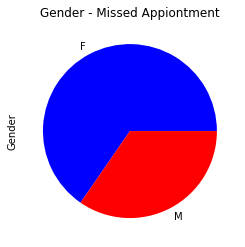

In [32]:
# Gender ratio of those that missed their appointment
colours = ['blue', 'Red']
Appointment_Yes_df.Gender.value_counts().plot(kind='pie', colors=colours)
plt.title('Gender - Missed Appiontment')

From the above chart, females are most likely to miss their appiontment than their male counterpart. This can be attributed to the larger female dataset or to the fact that women are most likely to seek a medical expert whenever they feel unwell.

In [33]:
# Value counts of those missed their appointment 
Appointment_Yes_df.Gender.value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

Text(0.5, 1.0, 'Gender - Kept Appiontment')

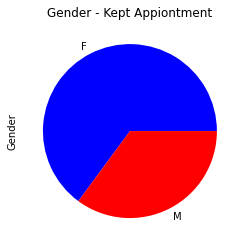

In [34]:
# Gender ratio of those that Kept their appointment
colours = ['blue', 'Red']
Appointment_No_df.Gender.value_counts().plot(kind='pie', colors=colours)
plt.title('Gender - Kept Appiontment')

In [35]:
# Value counts of those kept their appointment 
Appointment_No_df.Gender.value_counts(normalize=True)

F    0.648985
M    0.351015
Name: Gender, dtype: float64

From the graphs, the failure of keeping and the aability of keeping appointment is not attributed to genders. this is because the value counts for those who kept or missed their appointment are quite the same. This implies that gender state very little as to why a patient would miss their appointment

### Research Question 3: Does the time between the scheduled and the appiontment time have an effect on no-show?

In [36]:
# Day Differenecs between scheduling and appointment day for those who kept their appointment 
Appointment_No_df['DayDiff'].describe()

count    88207.000000
mean         7.754759
std         14.550450
min         -1.000000
25%         -1.000000
50%          1.000000
75%         11.000000
max        178.000000
Name: DayDiff, dtype: float64

In [37]:
#Day Differenecs between scheduling and appointment day for those who missed their appointment 
Appointment_Yes_df['DayDiff'].describe()

count    22319.000000
mean        14.831489
std         16.605912
min         -7.000000
25%          3.000000
50%         10.000000
75%         22.000000
max        178.000000
Name: DayDiff, dtype: float64

From the above descriptive dataset, the mean difference between scheduling and appointment days is 7 days for patient that kept their appointment and 14 days for those who do not. This is an indication that smaller the time between scheduling an apointment, the more liekly a patient would show up for teir appointment.

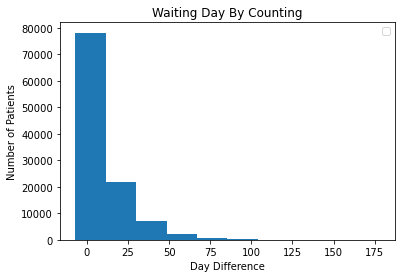

In [38]:
# Day differences plot for the general dataset
hist_plot_by(Appointment_df['DayDiff'],'Day Difference','Number of Patients','Waiting Day By Counting','')

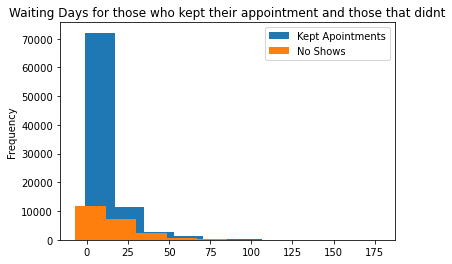

Kept Appointments Mean Day Differenec:7.75
Missed Appointments Mean Day Differenece:14.83


In [39]:
# Graphical representation of those that missed and kept their appointment
Appointment_No_df.DayDiff.plot.hist()
Appointment_Yes_df.DayDiff.plot.hist()
plt.title('Waiting Days for those who kept their appointment and those that didnt')
plt.legend(['Kept Apointments', 'No Shows'])
plt.show()
print('Kept Appointments Mean Day Differenec:{:.2f}'.format(Appointment_No_df.DayDiff.mean()))
print('Missed Appointments Mean Day Differenece:{:.2f}'.format(Appointment_Yes_df.DayDiff.mean()))

From the graph, patients tend to be sensitive to time delay and any lead time higher than two weeks can significantly cause the probability of failing to attend the appointment. A high lead time (e.g. having an appointment for two weeks later) significantly increases the probability of no-shows.

This could be as a result of the appointment falling during an unsuitable time for the patient.

# Research Question 3: Does no-show count have a correlation with receiving SMS?

Text(0.5, 1.0, 'SMS Receipeint - Missed Appiontment')

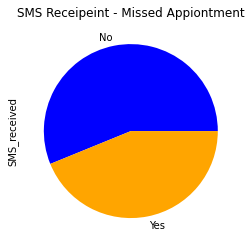

In [40]:
# SMS Receipeint for those who Missed Appiontment
colours = ['blue', 'orange']
labels = ['No', 'Yes']
Appointment_Yes_df['SMS_received'].value_counts().plot(kind='pie', colors=colours, labels=labels)
plt.title('SMS Receipeint - Missed Appiontment')

In [41]:
# Value counts of those that missed their appointment
Appointment_Yes_df['SMS_received'].value_counts(normalize=True)

0    0.561629
1    0.438371
Name: SMS_received, dtype: float64

Text(0.5, 1.0, 'SMS Receipeint - Kept Appiontment')

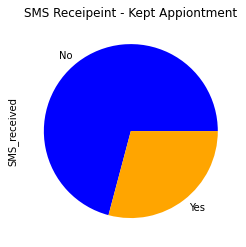

In [42]:
# SMS Receipeint for those who Kept Appiontment
colours = ['blue', 'orange']
labels = ['No', 'Yes']
Appointment_No_df['SMS_received'].value_counts().plot(kind='pie', colors=colours, labels=labels)
plt.title('SMS Receipeint - Kept Appiontment')

In [43]:
# Value counts of those that kept their appointment
Appointment_No_df['SMS_received'].value_counts(normalize=True)

0    0.708663
1    0.291337
Name: SMS_received, dtype: float64


Adding automated reminders such as SMS_reminder is expected to adjust patient behaviours. From the analysis above, the percentage of those who miss their appointment (44%) than those that kept appointment (29%) is much higher when SMS was received. However, the relationship between SMS_received and No Shows was contrary to what was expected. 
This is quite suprising as SMS are supposed to serve as reminders. 

## Checking if there is any relationship between peoples personal ailment and no-shows

Recent research into how no-shows can lead to personal ailments or harms have been conducted. Some of these harms include: a discontinued care process, longer waiting time for appointments, and higher (sometimes inappropriate) admissions to Emergency Room (ER) services. An inappropriate admission to an ER can drive medical expenses up as ER services are more expensive and provide little preventative care. Furthermore, missing a scheduled appointment causes a minimized access for other patients, this can create dissatisfaction among patients and healthcare providers, and suboptimal care results

Lets take a look and see if there is arelationship with hipertension and diabetes.

## Research  Question 4A: Do failure to keep Appiontment have relationship to Hipertension ##

Text(0.5, 1.0, 'Hipertension - Missed Appiontment')

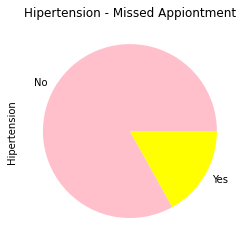

In [44]:
# Charts showing the correlation between personal ailment (hipertension) and No-show
colours = ['pink', 'Yellow']
labels = ['No', 'Yes']
Appointment_Yes_df['Hipertension'].value_counts().plot(kind='pie', colors=colours, labels=labels)
plt.title('Hipertension - Missed Appiontment')

In [45]:
# Value counts of hipertension patients for missed appointment
Appointment_Yes_df['Hipertension'].value_counts(normalize=True)

0    0.830996
1    0.169004
Name: Hipertension, dtype: float64

Text(0.5, 1.0, 'Hipertension - Kept Appiontment')

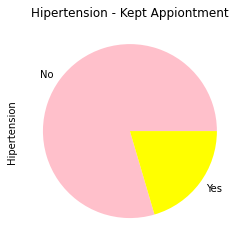

In [46]:
# Charts showing the correlation between personal ailment (hipertension) and those that kept appointment
colours = ['pink', 'Yellow']
labels = ['No', 'Yes']
Appointment_No_df['Hipertension'].value_counts().plot(kind='pie', colors=colours, labels=labels)
plt.title('Hipertension - Kept Appiontment')

In [47]:
# Value counts of hipertension patients for those that kept appointment 
Appointment_No_df['Hipertension'].value_counts(normalize=True)

0    0.795606
1    0.204394
Name: Hipertension, dtype: float64

It is important to note that the group of patients who missed their appointments contained a smaller proportion of patients with hypertension (16%) and the group of patients who kept their appointments contained a larger proportion of patients. This quite suprising to me. As always, correlation does not imply causation. Next, we run same analysis for another personal ailment (Diabetes)

## Research  Question 4B: Do failure to keep Appiontment have any correlation to Diabetes ##

Text(0.5, 1.0, 'Diabetes - Missed Appiontment')

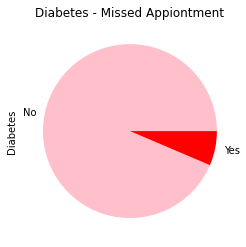

In [48]:
# Charts showing the correlation between personal ailment (Diabetes) and No-show
colours = ['pink', 'Red']
labels = ['No', 'Yes']
Appointment_Yes_df['Diabetes'].value_counts().plot(kind='pie', colors=colours, labels=labels)
plt.title('Diabetes - Missed Appiontment')

In [49]:
# Value counts of Diaetes patients for missed appointment
Appointment_Yes_df['Diabetes'].value_counts(normalize=True)

0    0.935929
1    0.064071
Name: Diabetes, dtype: float64

Text(0.5, 1.0, 'Diabetes - Kept Appiontment')

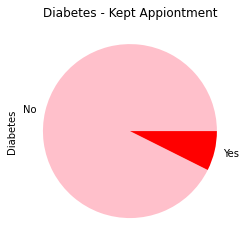

In [50]:
# Charts showing the correlation between personal ailment (Diabetes) and those that kept appointment
colours = ['pink', 'Red']
labels = ['No', 'Yes']
Appointment_No_df['Diabetes'].value_counts().plot(kind='pie', colors=colours, labels=labels)
plt.title('Diabetes - Kept Appiontment')

In [51]:
# Value counts of Diabetes patients for those that kept appointment 
Appointment_No_df['Diabetes'].value_counts(normalize=True)

0    0.926162
1    0.073838
Name: Diabetes, dtype: float64

Similarly to the analysis on hypertension, groups, we notice that most of patients sampled do not have diabetes. The rate of those living with diabetes is the same for both kept appointments and no show appointment. This could be due to the fact that patients who have diabetes would want to be monitoring their health status.

Further, constant missing of appointments can affect a patient’s health condition due to the delay in diagnosis or treatment. Prospective patients can also be impacted and less satisfied due to their inability of scheduling timely appointments.

**CONCLUSION** 

The study specifically found that majority (65%) of the respondents are female while the male group constitutes 35% of the respondents.
Out of this proportion, 20% of the respondents missed their appointment while 80% kept to their appointment. The mean age of those who kept their appointment is 37.79 years old while the mean age of those who missed their appointment is 34 years old. In essence, women are most likely to seek medical help as men have often times been known to neglect their health concerns. 

From the analysis, majority of those who missed their appointment are female. Also, patients tend to be sensitive to time delay and any lead time higher than two weeks can significantly cause the probability of failing to attend the appointment. A high lead time (e.g. having an appointment for two weeks later) significantly increases the probability of no-shows. It should be clearly stated that neither of this attributes explains the cause of No-Shows as correlation dosn't imply causation. In addition, the relationship between SMS_received and No Shows was contrary to what was expected as the percentage of those who miss their appointment is much higher when SMS was received.  

The study also shows the level of occurence between no shows and long term illness such as hypertension and diabetes. Due to the limitations of the study, I was not able to decide if no-shows causes long term illness.  The study 
Patient no-shows disrupt the healthcare delivery system by creating inefficiencies and keeping idle the utilization of valuable resources.

**Recommendations**

The recommendations below for the scheduling process may also be helpful for the purpose of reducing no-show rates:

1. Shortening the waiting time between scheduled and the actual appointment aka., lead time. As mentioned above, patients tend to be sensitive to time delay and any lead time higher than two weeks can significantly cause the probability of failing to attend the appointment.

2. Adding automated reminders to adjust patient behaviors (e.g. text messages, phone calls, emails) in reducing the level of missing appointment. It is possible that patients were more likely to be encouraged to enroll in SMS notifications after they have already missed an appointment.

**Limitations**

Based on the analysis conducted, we can not imply that any change in any of the variales would lead to an reduction or increase of no-shows. This is because correlation does not imply causation. To conduct a more extensive study, we would have to run  statistical test such as T-test, chi-test, regression analysis. 

**Reference**

Almalki, R. & Alshammari, R. (2021).Developing a Predictive Model of Predicting Appointment No-Show by Using Machine Learning Algorithms. Journal of Advances in Information Technology Vol. 12, No. 3, August 2021

Marbouh, D et al. (2020). Evaluating the Impact of Patient No-Shows on Service Quality. Risk Manag Healthc Policy. 2020; 13: 509–517

Pfeifer, E. (2020). Oh no!  A No-Show! Why Patients Don't Show Up For Appointments, and How to Reduce Patient No-Shows

Anonymous. No Show Appointments: Why They Happen and How to Reduce Them. Fellowship in the American College of Medical Practice Executives

